# Abalone case study

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{width: 100% important; }</style>"))

Importing Dataset

In [2]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Checking of null values in DataFrame

In [4]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Since there is no null value is present, it can be proceeded.

Here Rings is target column in the given Data set

In [6]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [11]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [16]:
df_visualization_nominal = df[['Sex']].copy()

In [17]:
df_visualization_nominal.columns

Index(['Sex'], dtype='object')

Visualization of the Data

In [18]:
import seaborn as sns

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


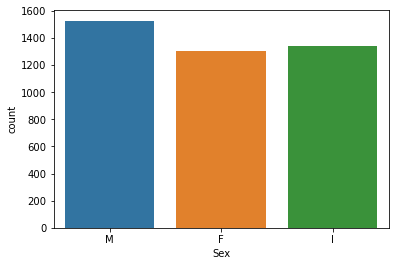

In [19]:
ax = sns.countplot(x='Sex',data=df_visualization_nominal)
print(df_visualization_nominal['Sex'].value_counts())

Checking distribution of the contious values

In [20]:
df_visualization_continuous = df[['Length','Diameter','Height','Whole weight',
                                  'Shucked weight','Viscera weight','Shell weight','Rings']].copy()

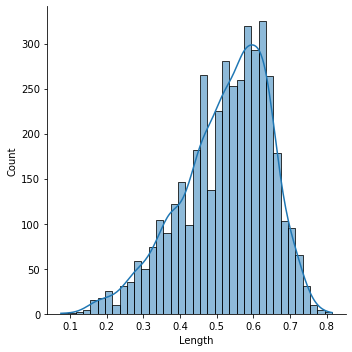

In [21]:
sns.displot(df_visualization_continuous['Length'], kde=True)

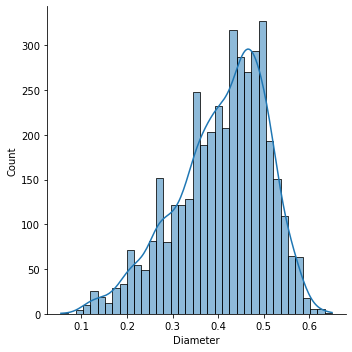

In [22]:
sns.displot(df_visualization_continuous['Diameter'], kde=True)

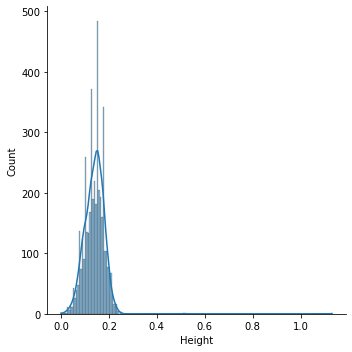

In [23]:
sns.displot(df_visualization_continuous['Height'], kde=True)

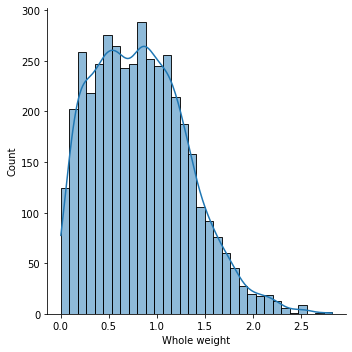

In [24]:
sns.displot(df_visualization_continuous['Whole weight'], kde=True)

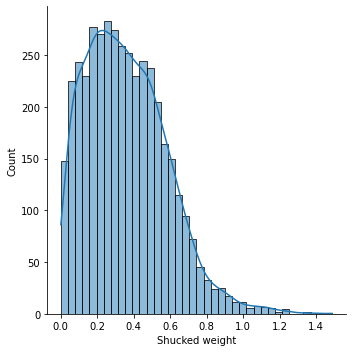

In [25]:
sns.displot(df_visualization_continuous['Shucked weight'], kde=True)

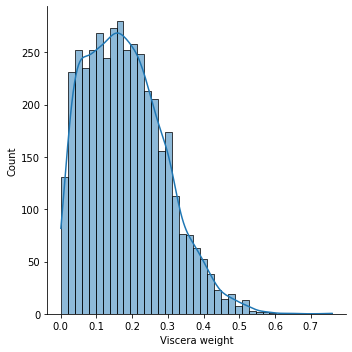

In [26]:
sns.displot(df_visualization_continuous['Viscera weight'], kde=True)

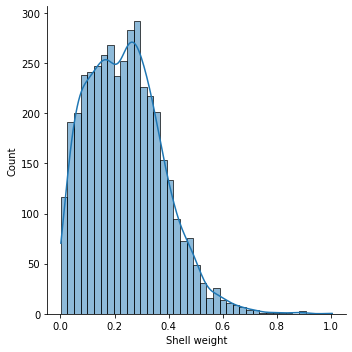

In [27]:
sns.displot(df_visualization_continuous['Shell weight'], kde=True)

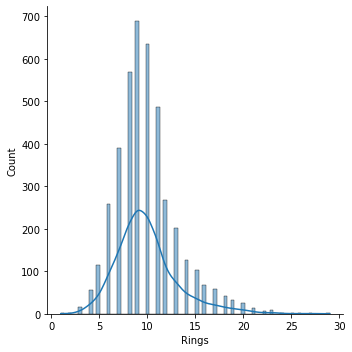

In [28]:
sns.displot(df_visualization_continuous['Rings'], kde=True)

Encoding of the DataFrame

In [29]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [31]:
for i in df.columns:
    if df[i].dtypes == "object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [32]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [33]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<AxesSubplot:>

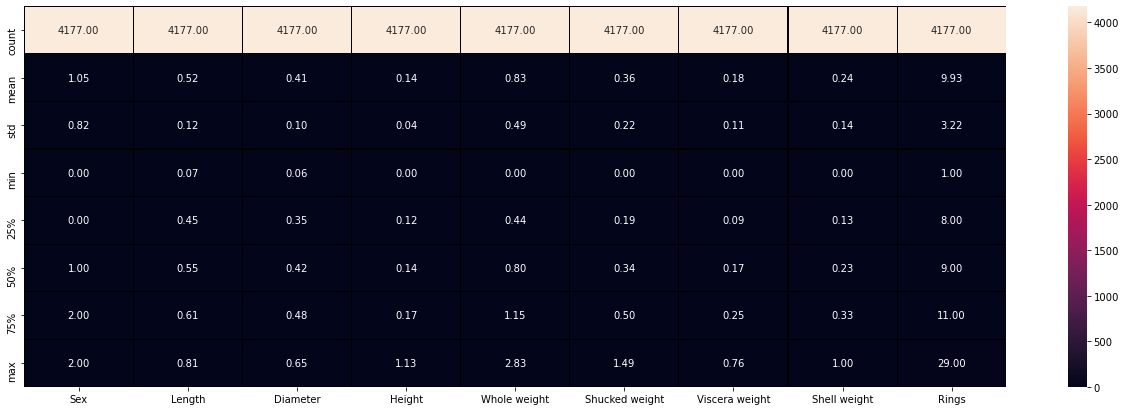

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

Corelation of the columns with target column

In [36]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [38]:
df.corr()['Rings'].sort_values()

Sex              -0.034627
Shucked weight    0.420884
Viscera weight    0.503819
Whole weight      0.540390
Length            0.556720
Height            0.557467
Diameter          0.574660
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

Skewness Check

In [39]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

Outliers' Check

<AxesSubplot:>

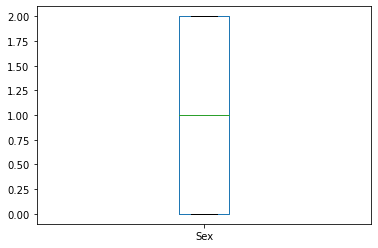

In [40]:
df['Sex'].plot.box()

<AxesSubplot:>

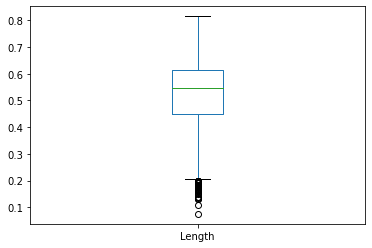

In [41]:
df['Length'].plot.box()

<AxesSubplot:>

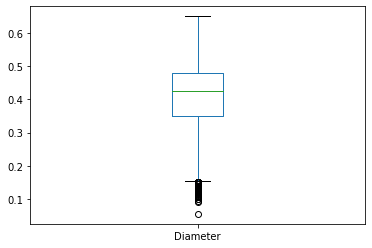

In [42]:
df['Diameter'].plot.box()

<AxesSubplot:>

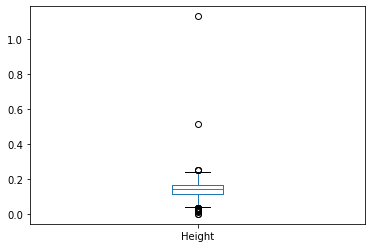

In [43]:
df['Height'].plot.box()

<AxesSubplot:>

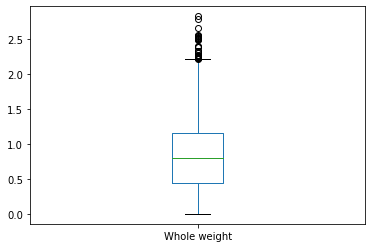

In [44]:
df['Whole weight'].plot.box()

<AxesSubplot:>

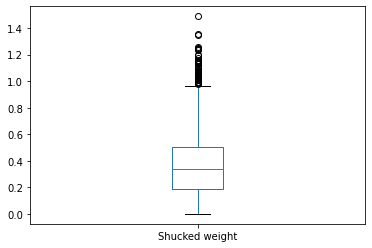

In [45]:
df['Shucked weight'].plot.box()

<AxesSubplot:>

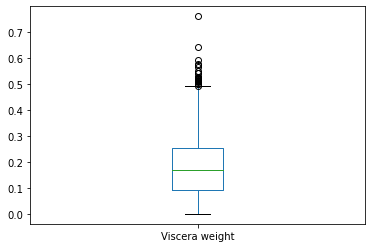

In [46]:
df['Viscera weight'].plot.box()

<AxesSubplot:>

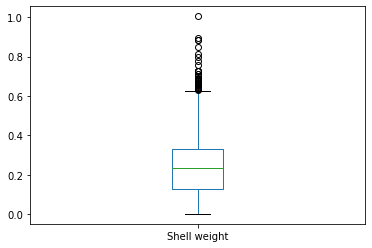

In [48]:
df['Shell weight'].plot.box()

In [49]:
df.shape

(4177, 9)

In [50]:
from scipy.stats import zscore

In [51]:
z=np.abs(zscore(df))
threshold = 3
np.where(z>3)

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
         166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
         238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
         334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
         433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
         674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
         754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
        1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
        1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
        1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
        1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
        2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
        2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
        2436, 2459, 2471, 2544, 2623, 

In [52]:
df_new_z = df[(z<3).all(axis=1)]
df_new_z

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [53]:
data_loss = (((4177-4027)/4177)*100)
data_loss

3.5910940866650707

Considering low corelation sex column is dropped

In [54]:
df = df_new_z.drop('Sex',axis=1)

In [55]:
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [81]:
x=df.drop("Rings", axis=1)
y=df["Rings"]

Scalling the data using Min-Max scaller

In [82]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [83]:
import warnings
warnings.filterwarnings('ignore')

In [84]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is 0.5177925127351461
At random state 0, the testing accuracy is 0.4932397434235294


At random state 1, the training accuracy is 0.5177925127351461
At random state 1, the testing accuracy is 0.4932397434235294


At random state 2, the training accuracy is 0.5177925127351461
At random state 2, the testing accuracy is 0.4932397434235294


At random state 3, the training accuracy is 0.5177925127351461
At random state 3, the testing accuracy is 0.4932397434235294


At random state 4, the training accuracy is 0.5177925127351461
At random state 4, the testing accuracy is 0.4932397434235294


At random state 5, the training accuracy is 0.5177925127351461
At random state 5, the testing accuracy is 0.4932397434235294


At random state 6, the training accuracy is 0.5177925127351461
At random state 6, the testing accuracy is 0.4932397434235294


At random state 7, the training accuracy is 0.5177925127351461
At random state 7, the testing accuracy is 0.493

In [85]:
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and accuracy for the testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.5094824858937593 and accuracy score for training is 0.5177925127351461 and accuracy for the testing is 0.4932397434235294


At cross fold 3 the cv score is 0.49565653312425045 and accuracy score for training is 0.5177925127351461 and accuracy for the testing is 0.4932397434235294


At cross fold 4 the cv score is 0.4207991338671665 and accuracy score for training is 0.5177925127351461 and accuracy for the testing is 0.4932397434235294


At cross fold 5 the cv score is 0.4147228008221194 and accuracy score for training is 0.5177925127351461 and accuracy for the testing is 0.4932397434235294


At cross fold 6 the cv score is 0.42650197012608254 and accuracy score for training is 0.5177925127351461 and accuracy for the testing is 0.4932397434235294


At cross fold 7 the cv score is 0.4367255328621921 and accuracy score for training is 0.5177925127351461 and accuracy for the testing is 0.4932397434235294


At cross fold 8 the cv score is 0.3981480939372855

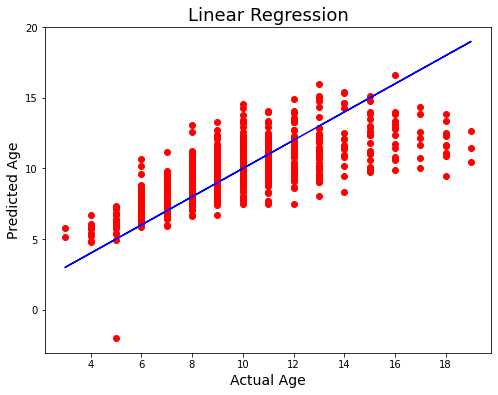

In [86]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Age',fontsize=14)
plt.ylabel('Predicted Age',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

Regularization

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

In [88]:
parameters = {'alpha':[.001, .01, .1, 1, 10], 'random_state': list(range(0,10))}
ls = Lasso()
clf= GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [89]:
ls=Lasso(alpha=0.001,random_state=0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)
ls_score_training*100

51.65981534976629

In [90]:
pred_ls=ls.predict(x_test)

In [91]:
lss=r2_score(y_test,pred_ls)
lss*100

49.29663819345706

In [92]:
cv_score = cross_val_score(ls,x,y,cv=5)
cv_mean = cv_score.mean()
cv_mean*100

41.44980954914813

Ensemble Techniques

In [94]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [95]:
rf = RandomForestRegressor(criterion="mse",max_features="sqrt")
rf.fit(x_train, y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score: ',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print('Cross Val Score: ',rfc*100)

R2 Score:  52.8960322646574
Cross Val Score:  45.625938639494926
